# Description:-

This project aims to predict house prices using the **Ames Housing Dataset**, which contains 79 property attributes. The workflow includes: 
- **Data Preprocessing**: Handling missing values, scaling quantitative features, and encoding qualitative features. 

- **Exploratory Data Analysis (EDA)**: To identify patterns and relationships in the dataseures.  
- **Feature Engineering**: Transforming and selecting the most relevant features for modeling.  
- **Model Building**: Developing and evaluating predictive models using techniques like Linear Regression and Random Forest Regressor.  
- **Prediction and Submission**: Generating predictions for the test dataset and preparing them for competition scoring.  

This project demonstrates the application of machine learning and data science techniques to solve a practical problem.
.  


<div style="text-align: center;">
    <img src="https://user-images.githubusercontent.com/48794028/148332938-4e66d4ca-2d16-474f-8482-340aef6a48d0.png" alt="Image Description" width="700" height="500">
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


# 1. Data Preprocessing

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Identify quantitative and qualitative columns
quantitative = [f for f in df_train.columns if df_train[f].dtype != 'object']
qualitative = [f for f in df_train.columns if df_train[f].dtype == 'object']

quantitative = [col for col in quantitative if col not in ['Id', 'SalePrice']]

print(f"Quantitative: {quantitative}")
print("\n---------------------------------------------------------\n")
print(f"Qualitative: {qualitative}")


Quantitative: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

---------------------------------------------------------

Qualitative: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQua

In [7]:
# Identify columns with missing values
null_counts = df_train.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
# Separate quantitative (numerical) and qualitative (categorical) features with missing values
quantitative_null = [f for f in null_columns.index if df_train[f].dtype != 'object']
qualitative_null = [f for f in null_columns.index if df_train[f].dtype == 'object']

print(f"Quantitative Features with Missing Values: {quantitative_null}\n")
print(f"Qualitative Features with Missing Values: {qualitative_null}\n")

# Handling missing values for quantitative (numerical) features
df_train[quantitative_null] = df_train[quantitative_null].fillna(df_train[quantitative_null].median())

for col in qualitative_null:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])


print("\nMissing values after imputation:")
null_counts = df_train.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

Quantitative Features with Missing Values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Qualitative Features with Missing Values: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Missing values after imputation:
Series([], dtype: int64)


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# 2. Exploratory Data Analysis (EDA) & Feature Engineering

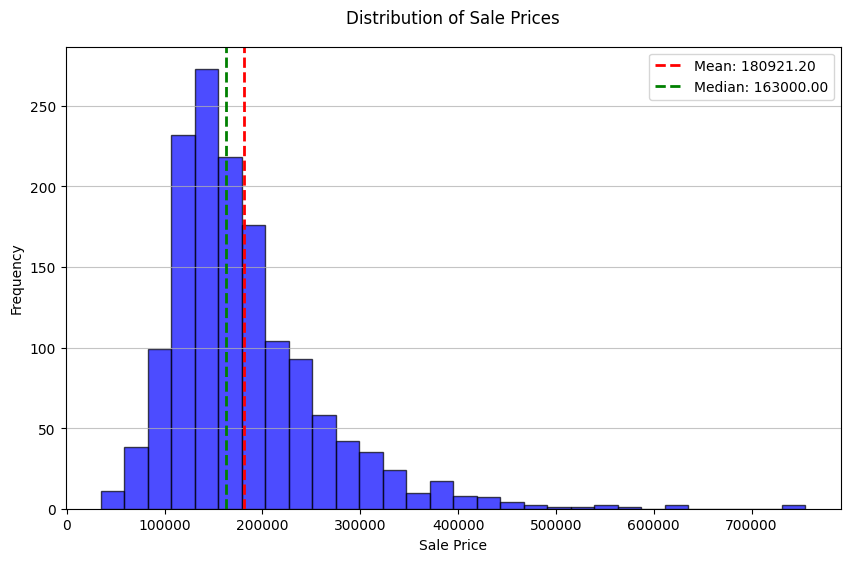

In [10]:
# Create a histogram of the SalePrice column
plt.figure(figsize=(10, 6))
plt.hist(df_train['SalePrice'], bins=30, color='blue', alpha=0.7, edgecolor='black')

mean_price = np.mean(df_train['SalePrice'])
median_price = np.median(df_train['SalePrice'])

# Add vertical lines for mean and median
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')

plt.title('Distribution of Sale Prices', pad=17)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend() 
plt.grid(axis='y', alpha=0.75) 

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

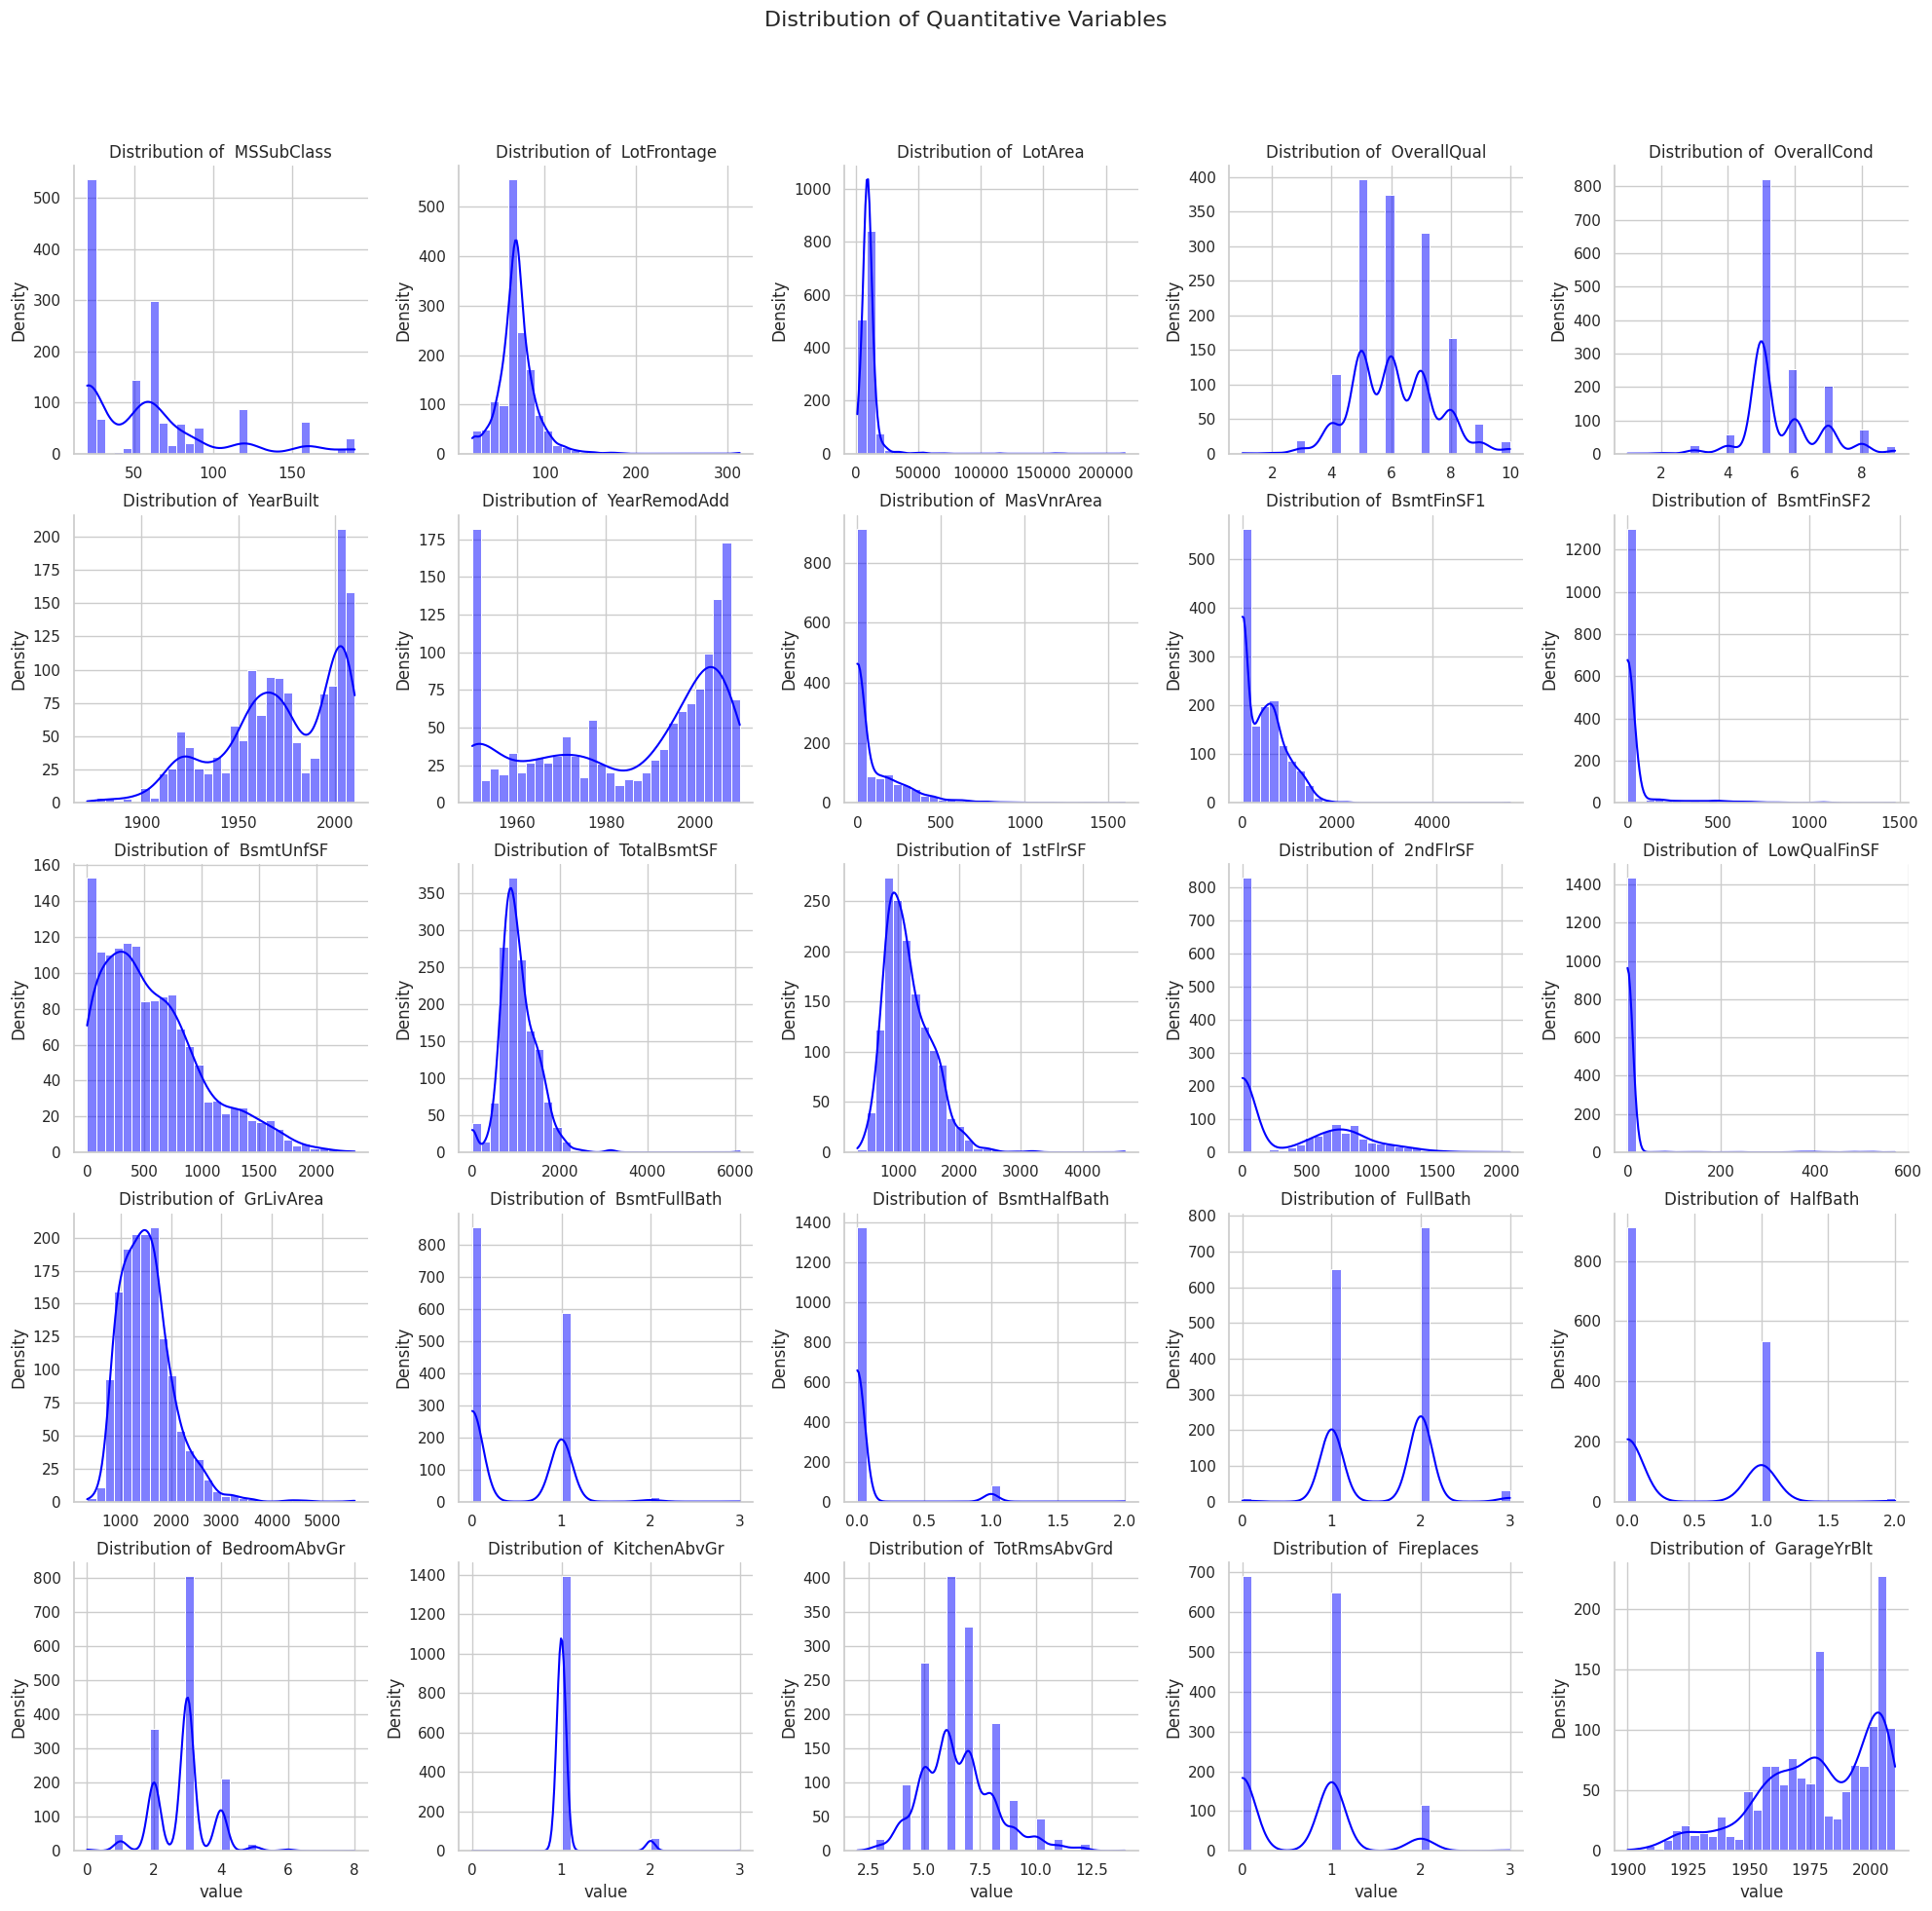

In [11]:
# Select a subset of quantitative features to visualize
quantitative_subset = quantitative[:25]  

f = pd.melt(df_train[quantitative_subset])

# Create FacetGrid with smaller number of columns
sns.set(style="whitegrid")
g = sns.FacetGrid(f, col="variable", col_wrap=5, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "value", kde=True, color='blue', bins=30)

for ax in g.axes.flat:
    ax.set_title(f'Distribution of {ax.get_title().split("=")[-1]}') 
    ax.set_ylabel('Density')  
    ax.grid(True) 

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Quantitative Variables', fontsize=16) 

plt.show()


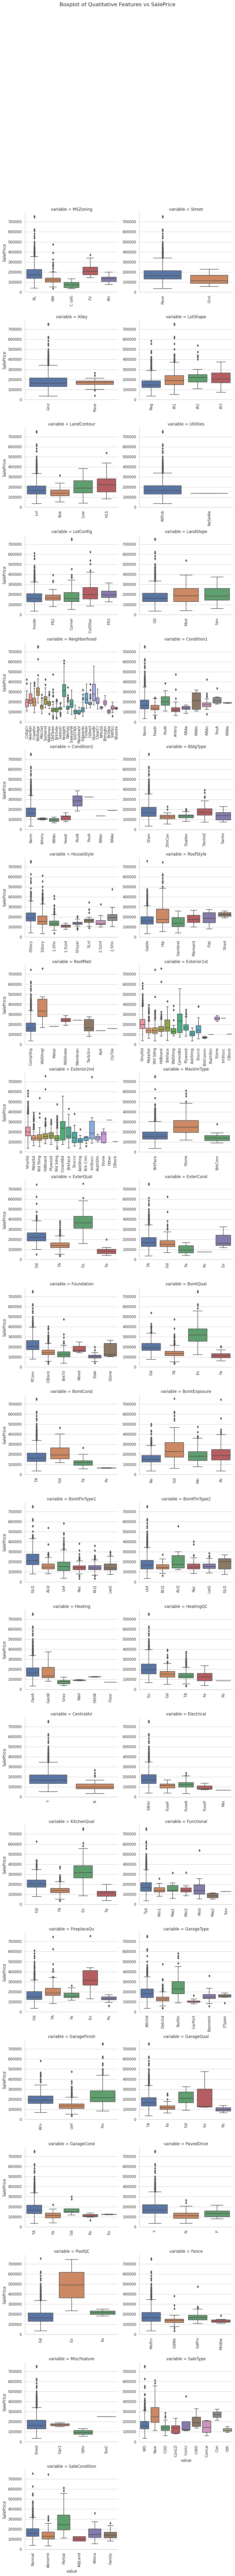

In [12]:
for c in qualitative:
    df_train[c] = df_train[c].astype('category')  
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])  
        df_train[c] = df_train[c].fillna('MISSING')

# Define a boxplot function to rotate x-axis labels
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90) 

f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=qualitative)

# Create FacetGrid for plotting multiple boxplots
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Boxplot of Qualitative Features vs SalePrice', fontsize=16)

plt.show()


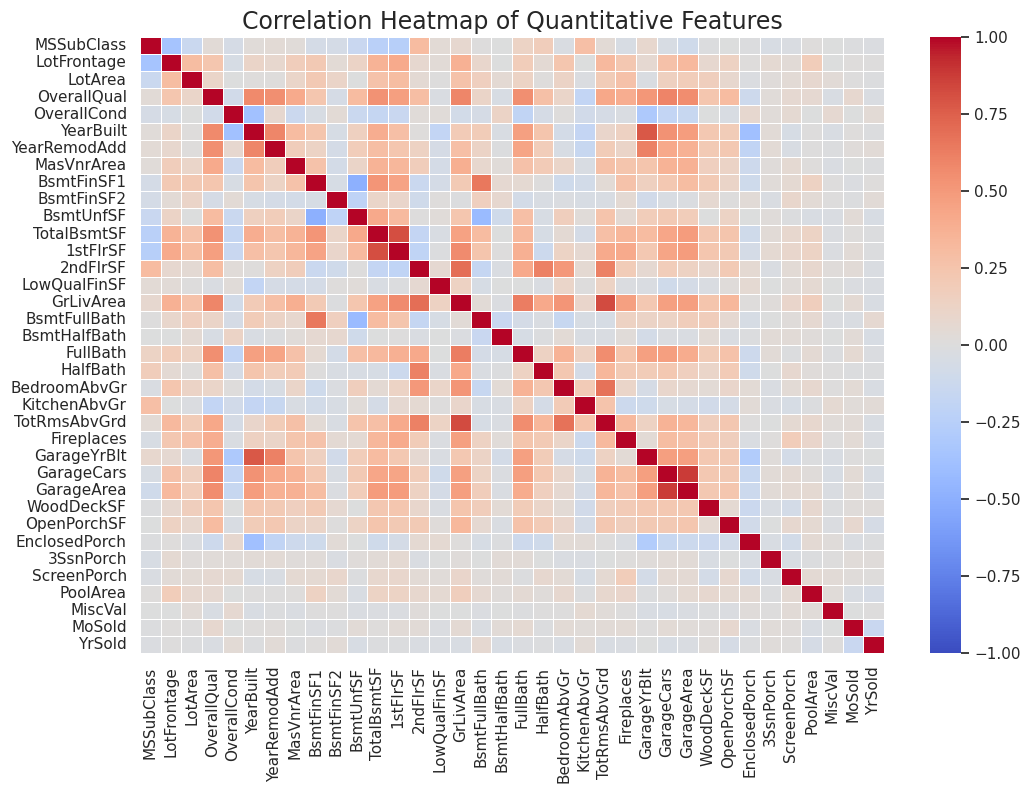

In [13]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df_train[quantitative].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Set title and labels
plt.title('Correlation Heatmap of Quantitative Features', fontsize=17)
plt.show()


# 3. Model Building

In [14]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
scaler = MinMaxScaler()
label_encoder = LabelEncoder()

df_train[quantitative] = scaler.fit_transform(df_train[quantitative])

for col in qualitative:
    df_train[col] = label_encoder.fit_transform(df_train[col])


Mean Squared Error (MSE) for Model 1 (Linear Regression): 1246953610.13
R-squared (R2) for Model 1: 0.84


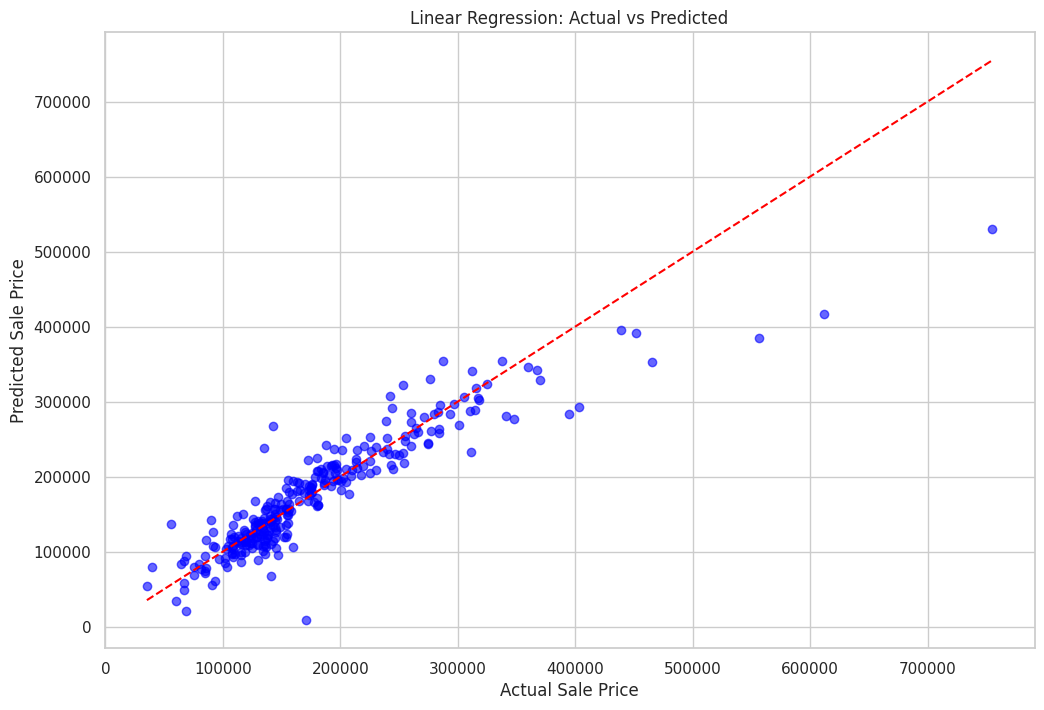

In [16]:

X = df_train[quantitative + qualitative] 

y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()

model1.fit(X_train, y_train)

y_pred_model1 = model1.predict(X_test)

mse_model1 = mean_squared_error(y_test, y_pred_model1)
r2_model1 = r2_score(y_test, y_pred_model1)

print(f'Mean Squared Error (MSE) for Model 1 (Linear Regression): {mse_model1:.2f}')
print(f'R-squared (R2) for Model 1: {r2_model1:.2f}')

plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_model1, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.show()


Mean Squared Error (MSE) for Model 2 (Random Forest): 809842908.42
R-squared (R2) for Model 2: 0.89


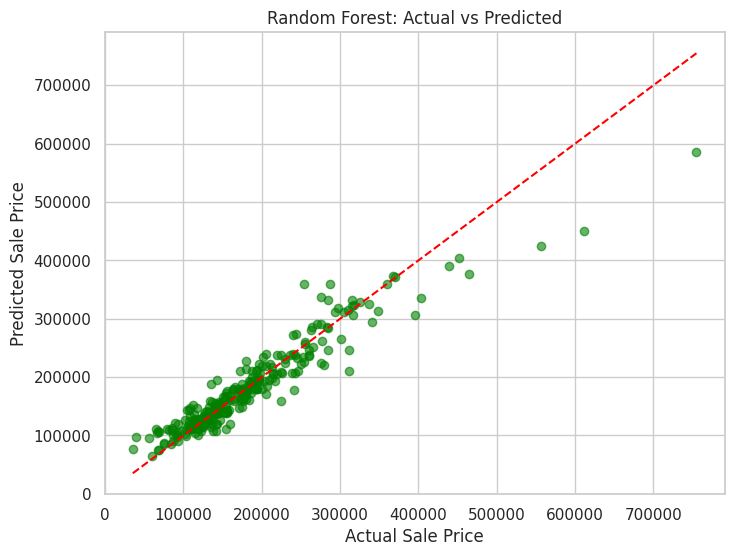

In [17]:

X = df_train.drop(['SalePrice', 'Id'], axis=1)

y = df_train['SalePrice']

X = X.fillna(X.mean())

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model2 = RandomForestRegressor(n_estimators=100, random_state=42)

model2.fit(X_train, y_train)

y_pred_model2 = model2.predict(X_test)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

print(f'Mean Squared Error (MSE) for Model 2 (Random Forest): {mse_model2:.2f}')
print(f'R-squared (R2) for Model 2: {r2_model2:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_model2, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.show()


In [18]:
# Identify quantitative and qualitative columns
quantitative = [f for f in df_test.columns if df_test[f].dtype != 'object']
qualitative = [f for f in df_test.columns if df_test[f].dtype == 'object']

quantitative = [col for col in quantitative if col not in ['Id']]

print(f"Quantitative: {quantitative}")
print("\n---------------------------------------------------------\n")
print(f"Qualitative: {qualitative}")


Quantitative: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

---------------------------------------------------------

Qualitative: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQua

# 4. Prediction and Submission

In [19]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
label_encoder = LabelEncoder()

df_test[quantitative] = scaler.fit_transform(df_test[quantitative])

for col in qualitative:
    df_test[col] = label_encoder.fit_transform(df_test[col])


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = df_test.drop('Id', axis=1)

# Impute missing values using the mean strategy 
imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(X)

# Predict SalePrice using the trained RandomForest model 
test2_preds = model2.predict(X_imputed)

output = pd.DataFrame({'Id': df_test['Id'], 
                       'SalePrice': test2_preds})

# Save the predictions in a CSV file for submission
output.to_csv('submission.csv', index=False)
